# Training a DQN agent to play Mastermind

## Imports & Constants

In [2]:
from agents import MlpDQNAgent, MlpNoisyDQNAgent
from environment import Mastermind, Code

## Training

In [3]:
env = Mastermind(history_length=5)

In [7]:
seed = 777
num_frames = 1_000_000
memory_size = 100_000
gamma = 0.85
batch_size = 32
target_update = 50
epsilon_decay = 1 / (num_frames // 2)

agent = MlpDQNAgent(
    env=env,
    memory_size=memory_size,
    batch_size=batch_size,
    target_update=target_update,
    epsilon_decay=epsilon_decay,
    seed=seed,
    gamma=gamma,
)

cuda


In [8]:
agent = MlpNoisyDQNAgent(
    env=env,
    memory_size=memory_size,
    batch_size=batch_size,
    target_update=target_update,
    seed=seed,
    gamma=gamma
)

cuda


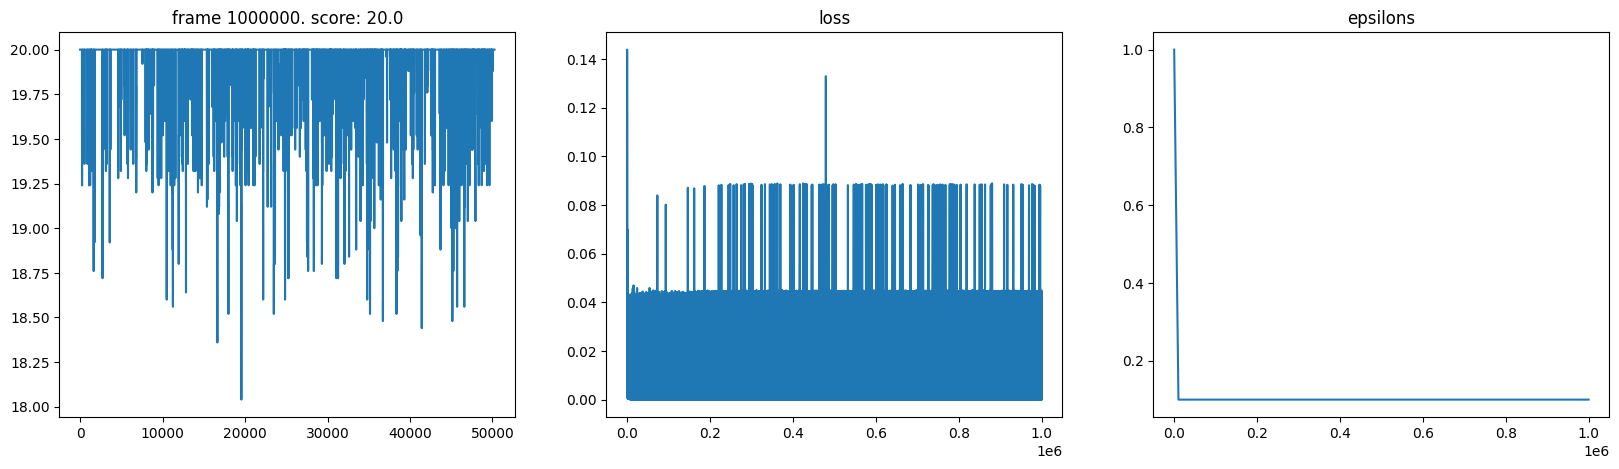

In [9]:
scores, losses, epsilons = agent.train(num_frames)

In [13]:
print(agent.dqn)

NoisyNetwork(
  (features): Linear(in_features=120, out_features=128, bias=True)
  (noisy_layer1): NoisyLinear()
  (noisy_layer2): NoisyLinear()
)


In [10]:
agent.test(10, time_interval=1)

Current Attempts: 20
Secret Code: 3114
History of Guesses and Feedback
Attempt 0: Guess = 5231, Feedback = (Black pegs: 0, White pegs: 2)
Attempt 1: Guess = 5231, Feedback = (Black pegs: 0, White pegs: 2)
Attempt 2: Guess = 5231, Feedback = (Black pegs: 0, White pegs: 2)
Attempt 3: Guess = 5231, Feedback = (Black pegs: 0, White pegs: 2)
Attempt 4: Guess = 5231, Feedback = (Black pegs: 0, White pegs: 2)


([20, 20, 20, 20, 20, 20, 20, 20, 20, 20],
 [-20, -20, -20, -20, -20, -20, -20, -20, -20, -20])